Classification Model

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

numpy.ndarray

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [29]:
# model.summary() 
# model.layers 
# weights, biases = model.layers[1].get_weights()
# kernel_initializer, bias_initializer

In [19]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7259 - accuracy: 0.7630 - val_loss: 0.5460 - val_accuracy: 0.8134
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4895 - accuracy: 0.8287 - val_loss: 0.4432 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4455 - accuracy: 0.8432 - val_loss: 0.4532 - val_accuracy: 0.8376
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4188 - accuracy: 0.8534 - val_loss: 0.4086 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3988 - accuracy: 0.8597 - val_loss: 0.4171 - val_accuracy: 0.8512
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3812 - accuracy: 0.8664 - val_loss: 0.3731 - val_accuracy: 0.8670
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3683 - accuracy: 0.8699 - val_loss: 0.3800 - val_accuracy:

In [22]:
# passing validation_data is optional, keras will evaluate additiona metrics on this data at the end of each epoch.
# instead of passing validation set, use validation_split=0.1 - use last 10% of train as validation

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

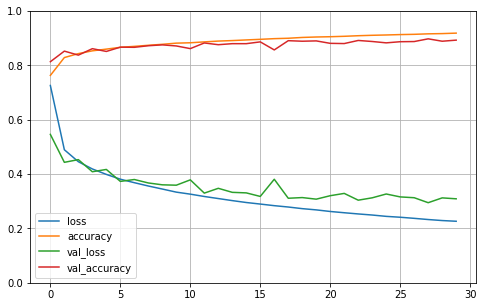

In [27]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #set the vertival range
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 76.2585 - accuracy: 0.8364


[76.258544921875, 0.8363999724388123]

Regression Model

In [39]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

The StandardScaler is user to scale the data to have zero mean and some standard deviation.
But there is also an option to normalize the data. Which to use when?

In [44]:
model = keras.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                        keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8084 - val_loss: 4.4914
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7038 - val_loss: 0.4597
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4471 - val_loss: 0.4249
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4243 - val_loss: 0.4244
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4129 - val_loss: 0.4054
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4067 - val_loss: 0.3963
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3937 - val_loss: 0.3897
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3866 - val_loss: 0.3853
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3825 - val_loss: 0.3810
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3766 - val_loss: 0.3761

Complex Models using Keras Functional API

In [47]:
input_ = keras.layers.Input(shape=X_train.shape)
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

We call each layer as a function, thus functional API
Here we are just telling how to connect layers, no data processed.

For multiple inputs/outputs check page 310.

# Subclassing API to build Dynamic Models

In [51]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(input_1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()
        

Use Callbacks to save Checkpoints

In [ ]:
# build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_mode.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])
# saves the model by default at the end of each epoch

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_mode.h5", 
                                               save_best_onle=True)
# While using validation set during training, saves the model which has the best 
# performance on the validation set

In [ ]:
# Early Stopping Callback
# Interrups training when it measures no progress on the validation set for a number of epochts.
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])
# can combine multiple callbacks.
# Custom Callbacks : Page 316.

Tensorboard for Visualization

In [52]:
# Modify the program so that it outputs the data to special binary log files called event files.
# Each binary data record is called SUMMARY.
import os
root_logdir = os.path.join(os.curdir, "mylogs")

In [ ]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

#[...] Build and Compile model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train)

FINE TUNING NN Hyperparameters

In [ ]:
# create a simple Sequential model
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-1, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.adD(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

# create keras_regressor
# use RandomizedSearchCV for hyperparameter search
# details and code - Page 321
# worls well for simple problems but not for complex models.
# There are libraries for doing that!

Stretch Pants Approach - 
It is more efficient to pick a model with more layers and neurons than you actually need and then use early stopping and other regularization techniques to prevent from overfitting.
This avoids bottleneck layers that could ruin our model.